### Data Source
##### Sloan Digital Sky Survey DR14: Classification of Stars, Galaxies and Quasar: 
##### https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey

##### Description
10,000 observations of space taken by the Sloan Digital Sky Survey (SDSS). 17 feature and 1 class column (identifying observation as a star, galaxy or quasar)

##### Variables/Columns
 objid = Object Identifier (PhotoObj table) [unique-drop]<br>
 ra = Right Ascension (PhotoObj table) [numerical]<br>
 dec = Declination (PhotoObj table) [numerical]<br>
 u, g, r, i, z = 5 bands of the telescope (per the Gunn-Thuan griz astronomical magnitude system) [numerical]<br>
 run = Run Number identifies the specific scan [categorical-23]<br>
 rerun = specifies how image was processed [unique-drop]<br>
 camcol = Camera Column (1 - 6) identifies scanline w/in the Run [categorical-6]<br>
 field = Field Number ~ starts at 11 (after an init'l rampup time) & can be as large as 800 for longer runs [categorical-703]<br>
 specobjid = Object Identifier [categorical-6349]<br>
 class = Object Class [Classification Labels/categorical-3]<br>
 redshift = Final Redshift [categorical-9637]<br>
 plate = Round AL plates at positions of objects of interest through which holes are drilled to  pass optical fiber [categorical-487]<br>
 mjd = Modified Julian Date (of Observation) [categorical-355]<br>
 fiberid = Optical Fiber ID  [categorical-892]

### Load CSV Data/Dependencies

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import warnings
# warnings.simplefilter('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
obsrv = pd.read_csv('./data/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

### Review/Clean Data 

In [4]:
# View DF preview
obsrv.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,plate,mjd,fiberid
0,1.237650e+18,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,752,301,4,267,3.722360e+18,STAR,-0.000009,3306,54922,491
1,1.237650e+18,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,752,301,4,267,3.638140e+17,STAR,-0.000055,323,51615,541
2,1.237650e+18,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,752,301,4,268,3.232740e+17,GALAXY,0.123111,287,52023,513
3,1.237650e+18,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,752,301,4,269,3.722370e+18,STAR,-0.000111,3306,54922,510
4,1.237650e+18,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,752,301,4,269,3.722370e+18,STAR,0.000590,3306,54922,512


In [5]:
# View data dimensions
obsrv.shape

(10000, 18)

In [6]:
# View Columns
print(f"Column Names:\n{obsrv.columns}\n")

# View Column Counts (unique)
print(f"Unique Count of Column Entries:\n{obsrv.apply(lambda x : x.nunique())}")

Column Names:
Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

Unique Count of Column Entries:
objid            1
ra           10000
dec          10000
u             9730
g             9817
r             9852
i             9890
z             9896
run             23
rerun            1
camcol           6
field          703
specobjid     6349
class            3
redshift      9637
plate          487
mjd            355
fiberid        892
dtype: int64


objid and rerun can be eliminated because they are uniform.<br>
run, camcol, field, specobjid, plate, mjd, and fiberid refer to the methods by which the image data was obtained.
We can set those aside for the moment.

In [7]:
df_test = pd.DataFrame(obsrv, columns=['ra','dec','u','g','r','i','z','class', 'redshift'])

In [8]:
# View Column Data Types
print(f"Column Data Types:\n{df_test.dtypes}\n")

Column Data Types:
ra          float64
dec         float64
u           float64
g           float64
r           float64
i           float64
z           float64
class        object
redshift    float64
dtype: object



In [10]:
# View Statistical Summary
print(f"Statistical Summary:\n{df_test.apply(lambda x : x.describe())}\n")

Statistical Summary:
                  ra           dec             u             g             r  \
25%       157.370946     -0.539035     18.178035     16.815100     16.173333   
50%       180.394514      0.404166     18.853095     17.495135     16.858770   
75%       201.547279     35.649397     19.259232     18.010145     17.512675   
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
freq             NaN           NaN           NaN           NaN           NaN   
max       260.884382     68.542265     19.599900     19.918970     24.802040   
mean      175.529987     14.836148     18.619355     17.371931     16.840963   
min         8.235100     -5.382632     12.988970     12.799550     12.431600   
std        47.783439     25.212207      0.828656      0.945457      1.067764   
top              NaN           NaN           NaN           NaN           NaN   
unique           NaN           NaN           NaN           NaN           NaN   

                  

In [9]:
print(f"Distribution of Classification Labels:\n{df_test.groupby('class').size()}\n")

Distribution of Classification Labels:
class
GALAXY    4998
QSO        850
STAR      4152
dtype: int64



In [17]:
df1 = pd.DataFrame(obsrv, columns=['ra','dec','u','g','r','i','z','class', 'redshift'])
df2 = pd.DataFrame(obsrv, columns=['u','g','r','i','z', 'class'])
df3 = pd.DataFrame(obsrv, columns=['u','g','r','i','z','class', 'redshift'])

### Proprocess Data
##### Update Class Column from STRING to INT

In [11]:
# from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df1['class'] = le.fit_transform(df1['class'])
df1.head()

,ra,dec,u,g,r,i,z,class,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,2,-0.000009
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,2,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,2,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,2,0.000590


### Visualize Data

##### Scatter Plot

Text(0.5, 1.0, 'Declination v Right Ascension Scatter Plot')

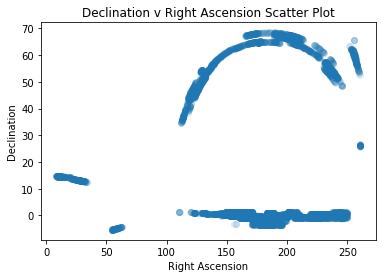

In [12]:
X = df1.ra.values
y = df1.dec.values.reshape(-1, 1)
plt.scatter(X, y, alpha=.1)
plt.xlabel("Right Ascension")
plt.ylabel("Declination")
plt.title("Declination v Right Ascension Scatter Plot")

##### Histogram

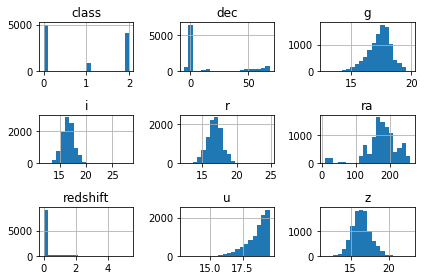

In [13]:
df1.hist(bins=20)
plt.tight_layout()

field, g, i, r, ra, and z show a Gaussian distribution, which could indicate a correlation

##### Scatter Matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002498F25B6C8>,
      dtype=object)

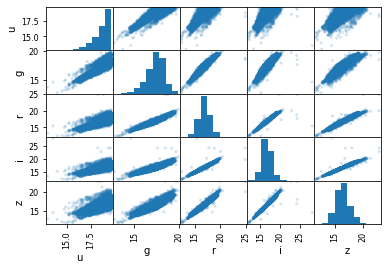

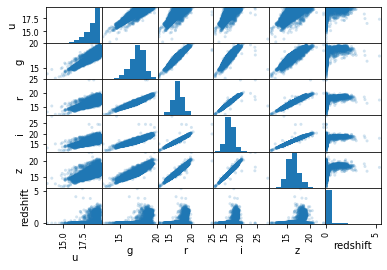

In [18]:
pd.plotting.scatter_matrix(df2, alpha=0.2)
pd.plotting.scatter_matrix(df3, alpha=0.2)